In [ ]:
import pandas as pd

df = pd.read_csv('Grocery_Items_54.csv')

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

onehot = pd.get_dummies(df)

frequent_itemsets = apriori(onehot, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

print(rules)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
# visualizing the result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


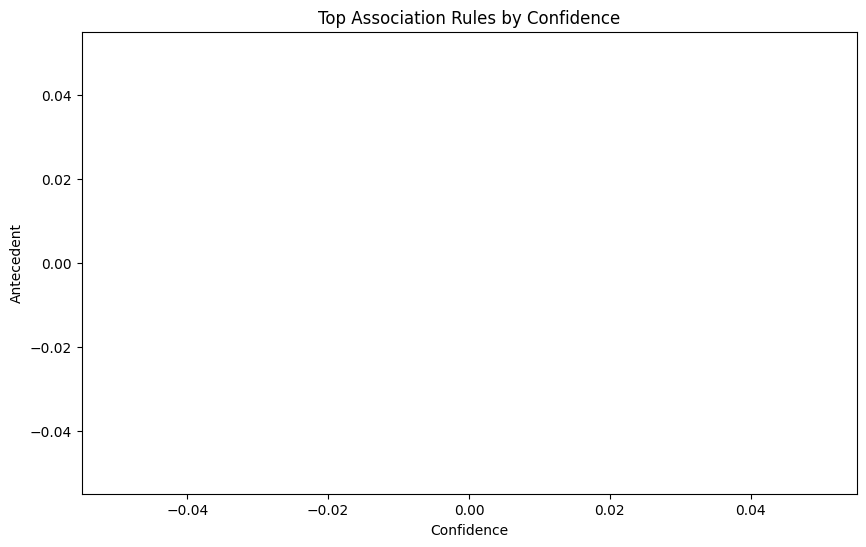

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(top_rules['antecedents'].apply(lambda x: list(x)[0]), top_rules['confidence'], color='skyblue')
plt.xlabel('Confidence')
plt.ylabel('Antecedent')
plt.title('Top Association Rules by Confidence')
plt.show()


In [ ]:
# (d).

In [ ]:
print(onehot.dtypes)


Instant food products    uint8
UHT-milk                 uint8
artif. sweetener         uint8
baking powder            uint8
bathroom cleaner         uint8
                         ...  
whipped/sour cream       uint8
white bread              uint8
whole milk               uint8
curd                     uint8
newspapers               uint8
Length: 939, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
msv_values = [0.001, 0.005, 0.01, 0.05]
mct_values = [0.05, 0.075, 0.1]


In [ ]:
rule_counts = []

for msv in msv_values:
    row_counts = []

    for mct in mct_values:
        # Perform association rule mining with the current msv and mct
        frequent_itemsets = apriori(onehot, min_support=msv, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct)

        # Count the number of rules
        num_rules = len(rules)
        row_counts.append(num_rules)

    rule_counts.append(row_counts)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


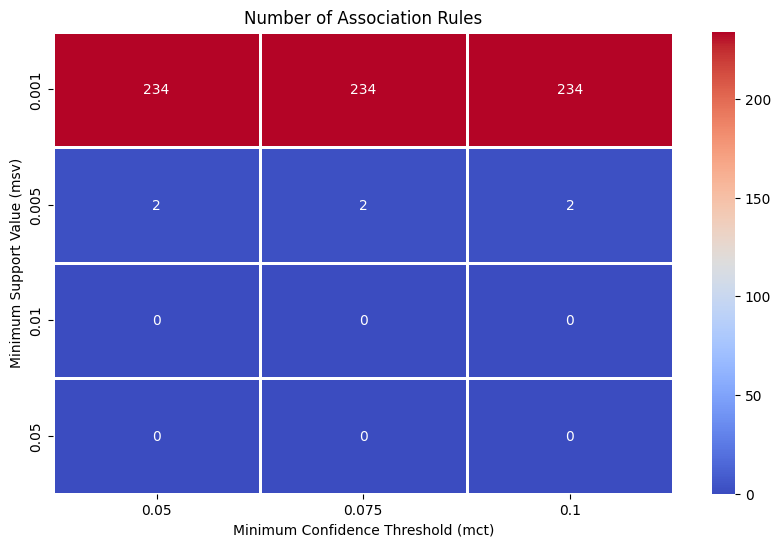

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the rule counts
rule_counts_df = pd.DataFrame(rule_counts, columns=mct_values, index=msv_values)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rule_counts_df, annot=True, cmap='coolwarm', fmt='d', linewidths=1)
plt.xlabel("Minimum Confidence Threshold (mct)")
plt.ylabel("Minimum Support Value (msv)")
plt.title("Number of Association Rules")
plt.show()


In [ ]:
e

In [ ]:
# Define the minimum support and minimum confidence thresholds
min_support = 0.005

# Filter rules that meet the minimum support threshold
filtered_rules = rules[rules['support'] >= min_support]

# Sort the filtered rules by confidence in descending order
sorted_rules = filtered_rules.sort_values(by='confidence', ascending=False)

# Display the top rule(s) with the highest confidence
top_rules = sorted_rules.head(1)
print(top_rules)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


** Part 2

In [ ]:
!unzip 'Assignment 1 Dataset.zip' -d /content/dataset


In [ ]:
# Exploring the dataset

In [2]:
import os

images_dir = '/content/dataset/Images'
for item in os.listdir(images_dir):
    if os.path.isdir(os.path.join(images_dir, item)):
        print(f'Directory: {item}')
    else:
        print(f'File: {item}')


Directory: n02109961-Eskimo_dog
Directory: n02093256-Staffordshire_bullterrier
Directory: n02113624-toy_poodle
Directory: n02105641-Old_English_sheepdog


In [ ]:
# loading and preprocessing of images

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining  data generators for training and validation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load and preprocess images
image_size = (150, 150)
batch_size = 32

train_generator = datagen.flow_from_directory(
    '/content/dataset/Images',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/dataset/Images',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 501 images belonging to 4 classes.
Found 124 images belonging to 4 classes.


In [ ]:
# creating the CNN model

In [7]:
from tensorflow.keras import layers, models

model = models.Sequential()

# 1. Convolutional Layer
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))

# 2. Max Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# 3. Flatten Layer
model.add(layers.Flatten())

# 4. Hidden Layer with 16 nodes
model.add(layers.Dense(16, activation='relu'))

# 5. Output Layer with 4 nodes (4 classes) and softmax activation
model.add(layers.Dense(4, activation='softmax'))


In [ ]:
# Compile and Train the Model

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    epochs=num_epochs
)


Epoch 1/20
15/15 [==============================] - 7s 326ms/step - loss: 2.0702 - accuracy: 0.2431 - val_loss: 1.3863 - val_accuracy: 0.2708
Epoch 2/20
15/15 [==============================] - 5s 314ms/step - loss: 1.3862 - accuracy: 0.2751 - val_loss: 1.3861 - val_accuracy: 0.2917
Epoch 3/20
15/15 [==============================] - 6s 397ms/step - loss: 1.3863 - accuracy: 0.2623 - val_loss: 1.3860 - val_accuracy: 0.2812
Epoch 4/20
15/15 [==============================] - 5s 293ms/step - loss: 1.3859 - accuracy: 0.2793 - val_loss: 1.3867 - val_accuracy: 0.2396
Epoch 5/20
15/15 [==============================] - 6s 377ms/step - loss: 1.3860 - accuracy: 0.2687 - val_loss: 1.3871 - val_accuracy: 0.2292
Epoch 6/20
15/15 [==============================] - 6s 366ms/step - loss: 1.3859 - accuracy: 0.2729 - val_loss: 1.3863 - val_accuracy: 0.2604
Epoch 7/20
15/15 [==============================] - 5s 318ms/step - loss: 1.3858 - accuracy: 0.2751 - val_loss: 1.3862 - val_accuracy: 0.2604
Epoch 

In [ ]:
# Plot Learning Curves

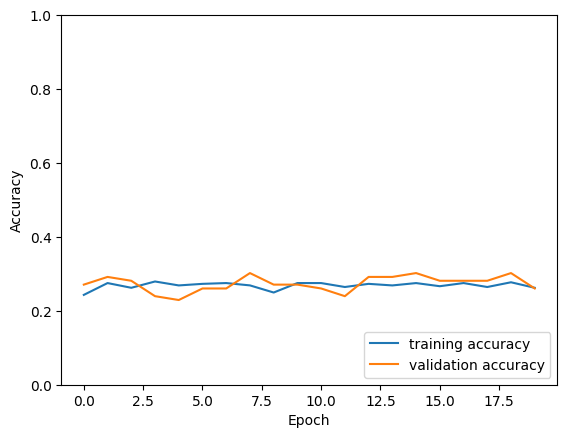

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Perfoming one of the experiments

In [ ]:
# Will be perfoming experiment (b)

Epoch 1/20
15/15 [==============================] - 8s 480ms/step - loss: 1.3762 - accuracy: 0.3113 - val_loss: 1.3522 - val_accuracy: 0.3646
Epoch 2/20
15/15 [==============================] - 6s 361ms/step - loss: 1.3558 - accuracy: 0.3433 - val_loss: 1.3172 - val_accuracy: 0.4271
Epoch 3/20
15/15 [==============================] - 7s 452ms/step - loss: 1.2743 - accuracy: 0.4542 - val_loss: 1.2227 - val_accuracy: 0.4583
Epoch 4/20
15/15 [==============================] - 6s 366ms/step - loss: 1.1760 - accuracy: 0.5032 - val_loss: 1.2540 - val_accuracy: 0.4271
Epoch 5/20
15/15 [==============================] - 5s 368ms/step - loss: 1.1285 - accuracy: 0.5096 - val_loss: 1.1744 - val_accuracy: 0.5208
Epoch 6/20
15/15 [==============================] - 7s 453ms/step - loss: 1.0723 - accuracy: 0.5885 - val_loss: 1.1525 - val_accuracy: 0.5104
Epoch 7/20
15/15 [==============================] - 5s 359ms/step - loss: 1.0266 - accuracy: 0.5864 - val_loss: 1.1139 - val_accuracy: 0.4792
Epoch 

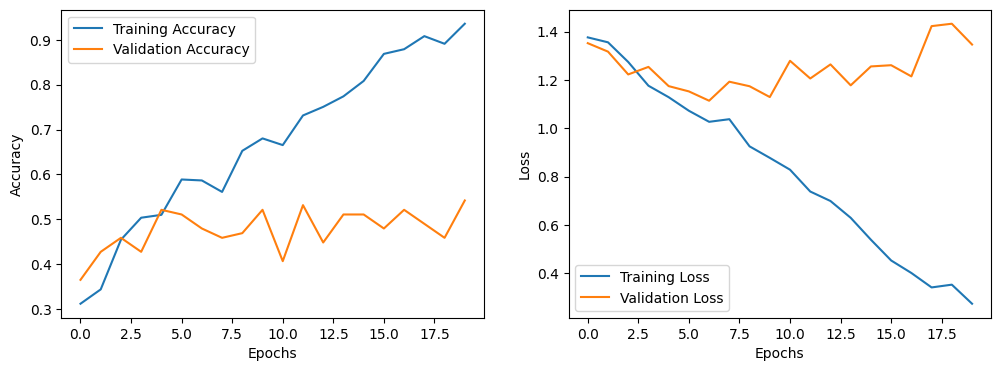

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Define the model
model = models.Sequential()
image_size = (150, 150)
batch_size = 32

# First Convolutional Layer with 4 filters
model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

# Hidden Layer with 16 nodes
model.add(layers.Dense(16, activation='relu'))

# Output Layer with 4 nodes
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with your previous dataset
num_epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    epochs=num_epochs
)

# Plot the learning curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Learning curve

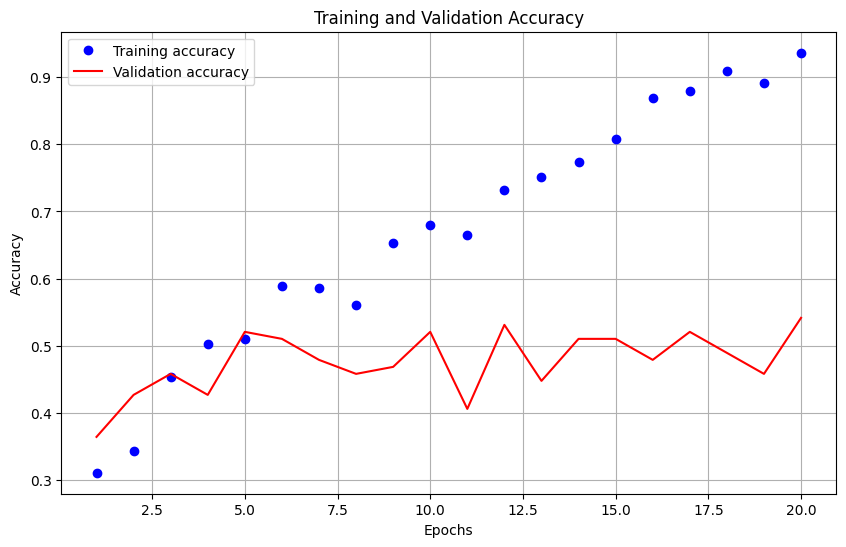

In [11]:
import matplotlib.pyplot as plt

# Access the training history
history = model.history

# Extract the training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a list of epoch numbers for the x-axis
epochs = range(1, len(train_accuracy) + 1)

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
